In [5]:
#Import the libraries for create AI brain
import numpy as np                #numpy is and library and used for mathematical calculation
import matplotlib.pyplot as plt   #matplotlib is an library and used for plot graph using History data
import pandas as pd               #Pandas is an library and used for import File data(Raw data) to program for train and test the model 

In [6]:
#data value variables are stored
data = pd.read_csv("Salary_Data.CSV")   #Import "Salary_Data" to Variable "data" using method pd.read_csv

In [7]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
#Move the "YearsExperience" and "Salary" data to independent and dependent variable for further process
independent = data[["YearsExperience"]]   #Indenpendent variable,years of experiance,datatype float
dependent = data[["Salary"]]             #Dependent vaiable, Salary, data type float

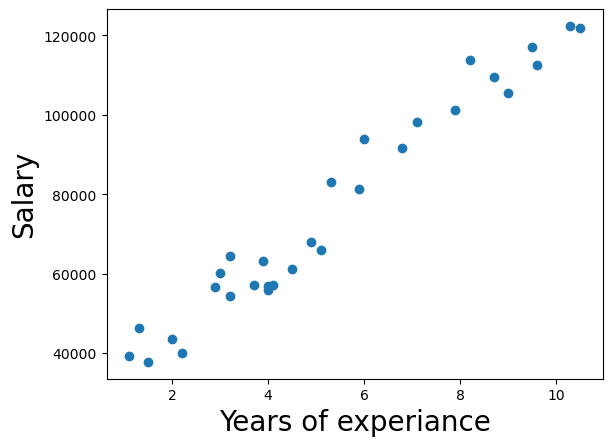

In [9]:
#Using matplotlib.pyplot as plt to Visualize the "YearExperaince"(independent data- X-Axis) and "Salary"(dependent data-Y-Axis) to Regerssion
plt.scatter(independent,dependent)              #Scatter the independent and dependent data
plt.xlabel("Years of experiance",fontsize=20 )  #label the X-Axis to "Years of experiance" and set font size to 20
plt.ylabel("Salary", fontsize=20)               #label the Y-Axis to "salary" and set font size to 20
plt.show()                                      #Show the graph

In [10]:
#Split the data like Indenpendent train(X_train),independent test(X_test),Dependent train(Y_train),Dependent test(Y_test)
# using train_test_split function from Sklearn.model_selection
from sklearn.model_selection import train_test_split     # Import train_test_split function from sklearn.model_selection library

# split the data independent(X_train),independent(X_test),Dependent train(Y_train),Dependent test(Y_test)
x_train,x_test,y_train,y_test = train_test_split(independent,dependent, test_size = 1/3, random_state = 0) 

In [11]:
# View the independent test data in variable y_test
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0
22,101302.0


In [13]:
# Import LinearRegression class from sklearn.linear_modal Library
from sklearn.linear_model import LinearRegression

# Regressor object created from class LinearRegression()
regressor = LinearRegression()

#Create model using fit function passing independent train data(x_train) & dpenedent train data(y_train)
regressor.fit(x_train,y_train)  #y=wx1+b for this equation we got value for W(weight) and b(bias)

LinearRegression()

In [14]:
#Viewing the W(weight) and b(bias) value
# View the W(weight) value store in attributes name coef_ of regressor object
weight = regressor.coef_
print(f"Weight of the model={ weight }")

# View the Bias value store in attributes name intercept_ of regressor object
bais = regressor.intercept_
print(f"Intercept of the model= { bais }")

Weight of the model=[[9345.94244312]]
Intercept of the model= [26816.19224403]


In [16]:
#Predict the value for independent test set(x_test) using function predict in regressor object
y_pred = regressor.predict(x_test)

In [17]:
# display predicted salary value for test set
y_pred 

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [18]:
#Validating the trained model using r2_score function from sklearn.metrics library how much perfect the model
#Note: R2 value must between 0 to 1  and nearest to 1 is good trained model
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)   #for find score value using r2_score method and pass dependent test(y_test) & dependent prediction

In [22]:
# Display the R_score value its neaerest to 1 so good model
r_score

0.9749154407708353

In [19]:
#find the predicted salary for given input years of experiance 
prediction_input=int(input(" enter the prediction input value:"))

# pass the input to the predict function in regressor object & print Future predicted Salary value
Future_prediction = regressor.predict([[prediction_input]])  
print(f"Future_prediction :{ Future_prediction} ")

 enter the prediction input value: 16


Future_prediction :[[176351.27133399]] 


C:\Users\Bruger\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
#Pickle is a library, used to save the model in file
import pickle
filename="finalized_model_linear.sav"  # declate the file name to "filename" variable

In [22]:
#write model in binary format(wb) in file "finalized_model_linear.sav" using function dump
pickle.dump(regressor,open(filename,'wb'))

In [25]:
#Test the model before deployment
#Load or read the file and store in loaded_model
loaded_model = pickle.load(open("finalized_model_linear.sav",'rb'))

#call predict function from loaded_model object passing required input( years of experiance) and stored in result variable
result=loaded_model.predict([[15]])

C:\Users\Bruger\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
#Show the result from "result" variable
result

array([[167005.32889087]])